training data:
X: [1.         1.47368421 1.94736842 2.42105263 2.89473684] ...
y: [3.49671415 3.80910412 5.54242538 7.36513512 6.55532031] ...
real data: w=2, b=1
--------------------------------------------------
Epoch 0  MSE=164.36
Epoch 500  MSE=0.56
Epoch 1000  MSE=0.55
Epoch 1500  MSE=0.55

final result:
trained model: y = 1.79x + 1.98
real data:   y = 2x + 1
R²: 0.978

 predicted for [11 12 13]: [21.67 23.46 25.25]

 chart...


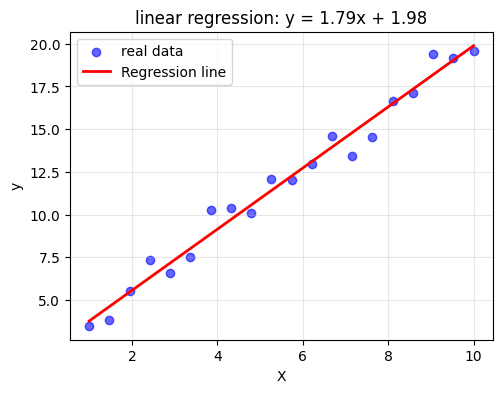

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

class LinearRegression:


    def __init__(self, lr: float = 0.05, epochs: int = 1000):
        self.lr = lr
        self.epochs = epochs
        self.w: float = 0.0
        self.b: float = 0.0
        self.losses: list = []

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        """training model with GD"""
        n = len(X)
        self.losses = []

        for i in range(self.epochs):
            y_pred = self.w * X + self.b
            error = y_pred - y


            dw = (2/n) * np.sum(error * X)
            db = (2/n) * np.sum(error)


            self.w -= self.lr * dw
            self.b -= self.lr * db


            mse = np.mean(error**2)
            self.losses.append(mse)


            if i % 500 == 0:
                print(f"Epoch {i}  MSE={mse:.2f}")

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        return self.w * X + self.b

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

    def plot_results(self, X: np.ndarray, y: np.ndarray):
        plt.figure(figsize=(12, 4))


        plt.subplot(1, 2, 1)
        plt.scatter(X, y, color='blue', alpha=0.6, label='real data')

        X_line = np.linspace(min(X), max(X), 100)
        y_line = self.predict(X_line)
        plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression line')

        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'linear regression: y = {self.w:.2f}x + {self.b:.2f}')
        plt.legend()
        plt.grid(True, alpha=0.3)



if __name__ == "__main__":
    X = np.linspace(1, 10, 20)

    true_w = 2
    true_b = 1
    noise_level = 1.0

    np.random.seed(42)
    noise = np.random.randn(len(X)) * noise_level
    y = true_w * X + true_b + noise

    print("training data:")
    print(f"X: {X[:5]} ...")
    print(f"y: {y[:5]} ...")
    print(f"real data: w={true_w}, b={true_b}")
    print("-" * 50)


    model = LinearRegression(lr=0.01, epochs=2000)
    model.fit(X, y)


    print("\n" + "=" * 50)
    print("final result:")
    print(f"trained model: y = {model.w:.2f}x + {model.b:.2f}")
    print(f"real data:   y = {true_w}x + {true_b}")
    print(f"R²: {model.score(X, y):.3f}")


    X_test = np.array([11, 12, 13])
    preds = model.predict(X_test)
    print(f"\n predicted for {X_test}: {np.round(preds, 2)}")


    print("\n chart...")
    model.plot_results(X, y)